<a href="https://colab.research.google.com/github/01235-anuj/Sales-Prediction-and-EDA/blob/main/sales_Prediction_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [55]:
df = pd.read_csv("/content/SuperMarket Analysis.csv")

In [56]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [57]:
df.shape

(1000, 17)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [59]:
df['Customer type'].nunique()

2

In [60]:
df['Customer type'].value_counts()

,count
Customer type,
Member,565
Normal,435


In [61]:
df['Branch'].value_counts()

,count
Branch,
Alex,340
Cairo,332
Giza,328


In [62]:
df['City'].value_counts()

,count
City,
Yangon,340
Mandalay,332
Naypyitaw,328


In [63]:
df['Product line'].value_counts()

,count
Product line,
Fashion accessories,178
Food and beverages,174
Electronic accessories,170
Sports and travel,166
Home and lifestyle,160
Health and beauty,152


In [64]:
df['Product line'].value_counts()

,count
Product line,
Fashion accessories,178
Food and beverages,174
Electronic accessories,170
Sports and travel,166
Home and lifestyle,160
Health and beauty,152


In [65]:
df['Payment'].value_counts()

,count
Payment,
Ewallet,345
Cash,344
Credit card,311


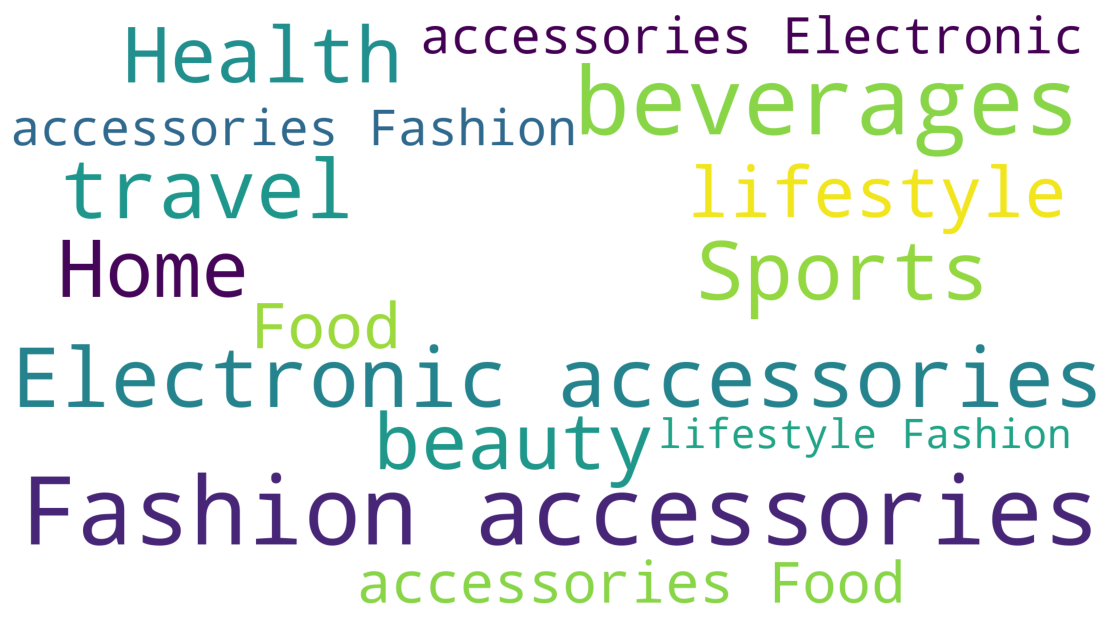

In [66]:
from wordcloud import WordCloud
plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='White',width=1920,height=1080).generate(" ".join(df['Product line']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

In [76]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])   # convert back to datetime
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df = df.drop(columns=['Date'])  # drop original date column


In [77]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Sales,0


<Axes: xlabel='Unit price', ylabel='Rating'>

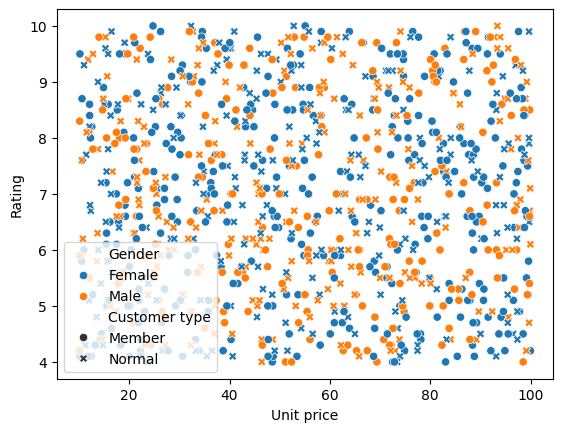

In [78]:
sns.scatterplot(data=df, x='Unit price', y='Rating',hue='Gender',style='Customer type')

<Axes: xlabel='gross income'>

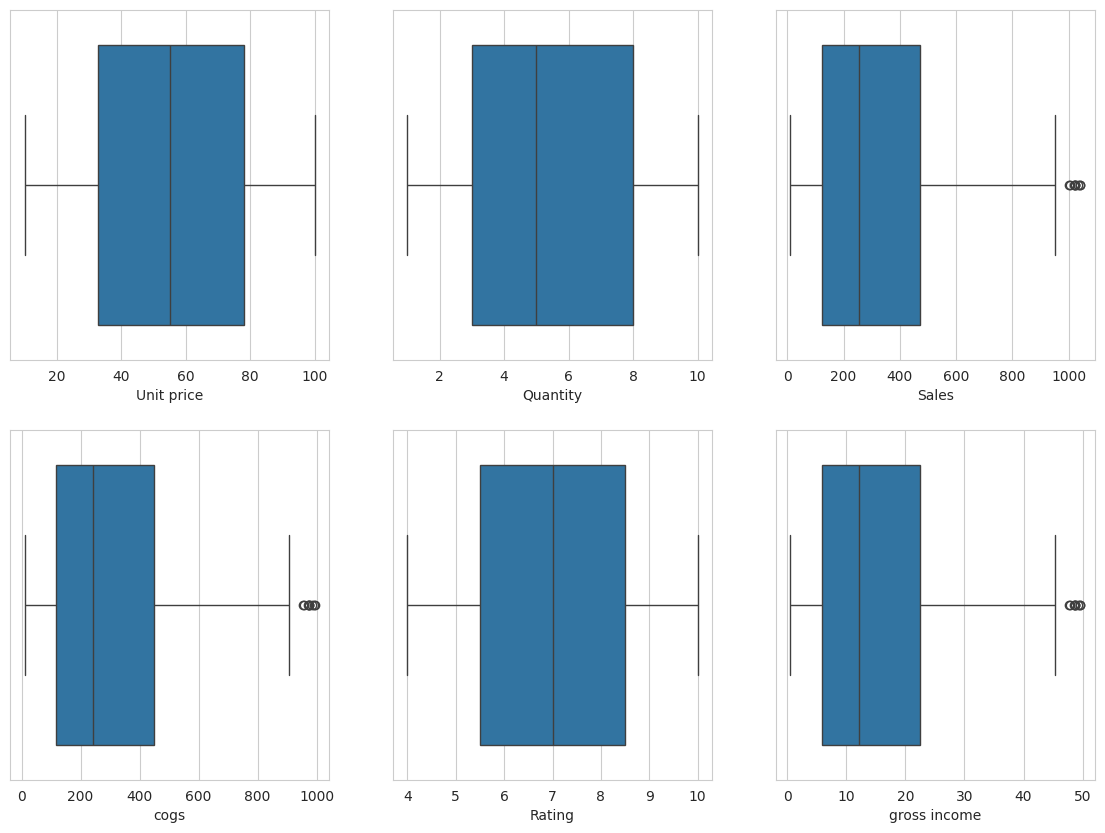

In [79]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Unit price',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='Quantity',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Sales',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='cogs',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Rating',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='gross income',data=df)

<Axes: xlabel='gross income', ylabel='Density'>

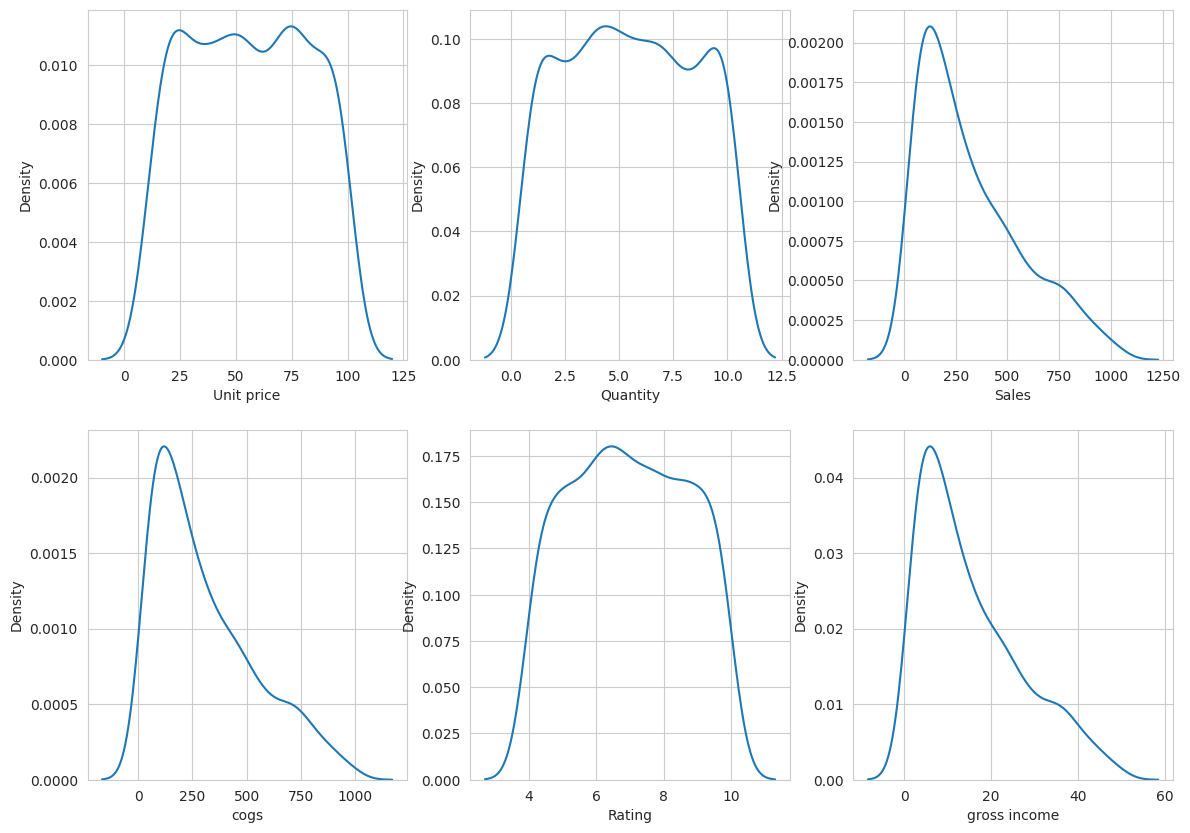

In [80]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.kdeplot(x='Unit price',data=df)
plt.subplot(2,3,2)
sns.kdeplot(x='Quantity',data=df)
plt.subplot(2,3,3)
sns.kdeplot(x='Sales',data=df)
plt.subplot(2,3,4)
sns.kdeplot(x='cogs',data=df)
plt.subplot(2,3,5)
sns.kdeplot(x='Rating',data=df)
plt.subplot(2,3,6)
sns.kdeplot(x='gross income',data=df)

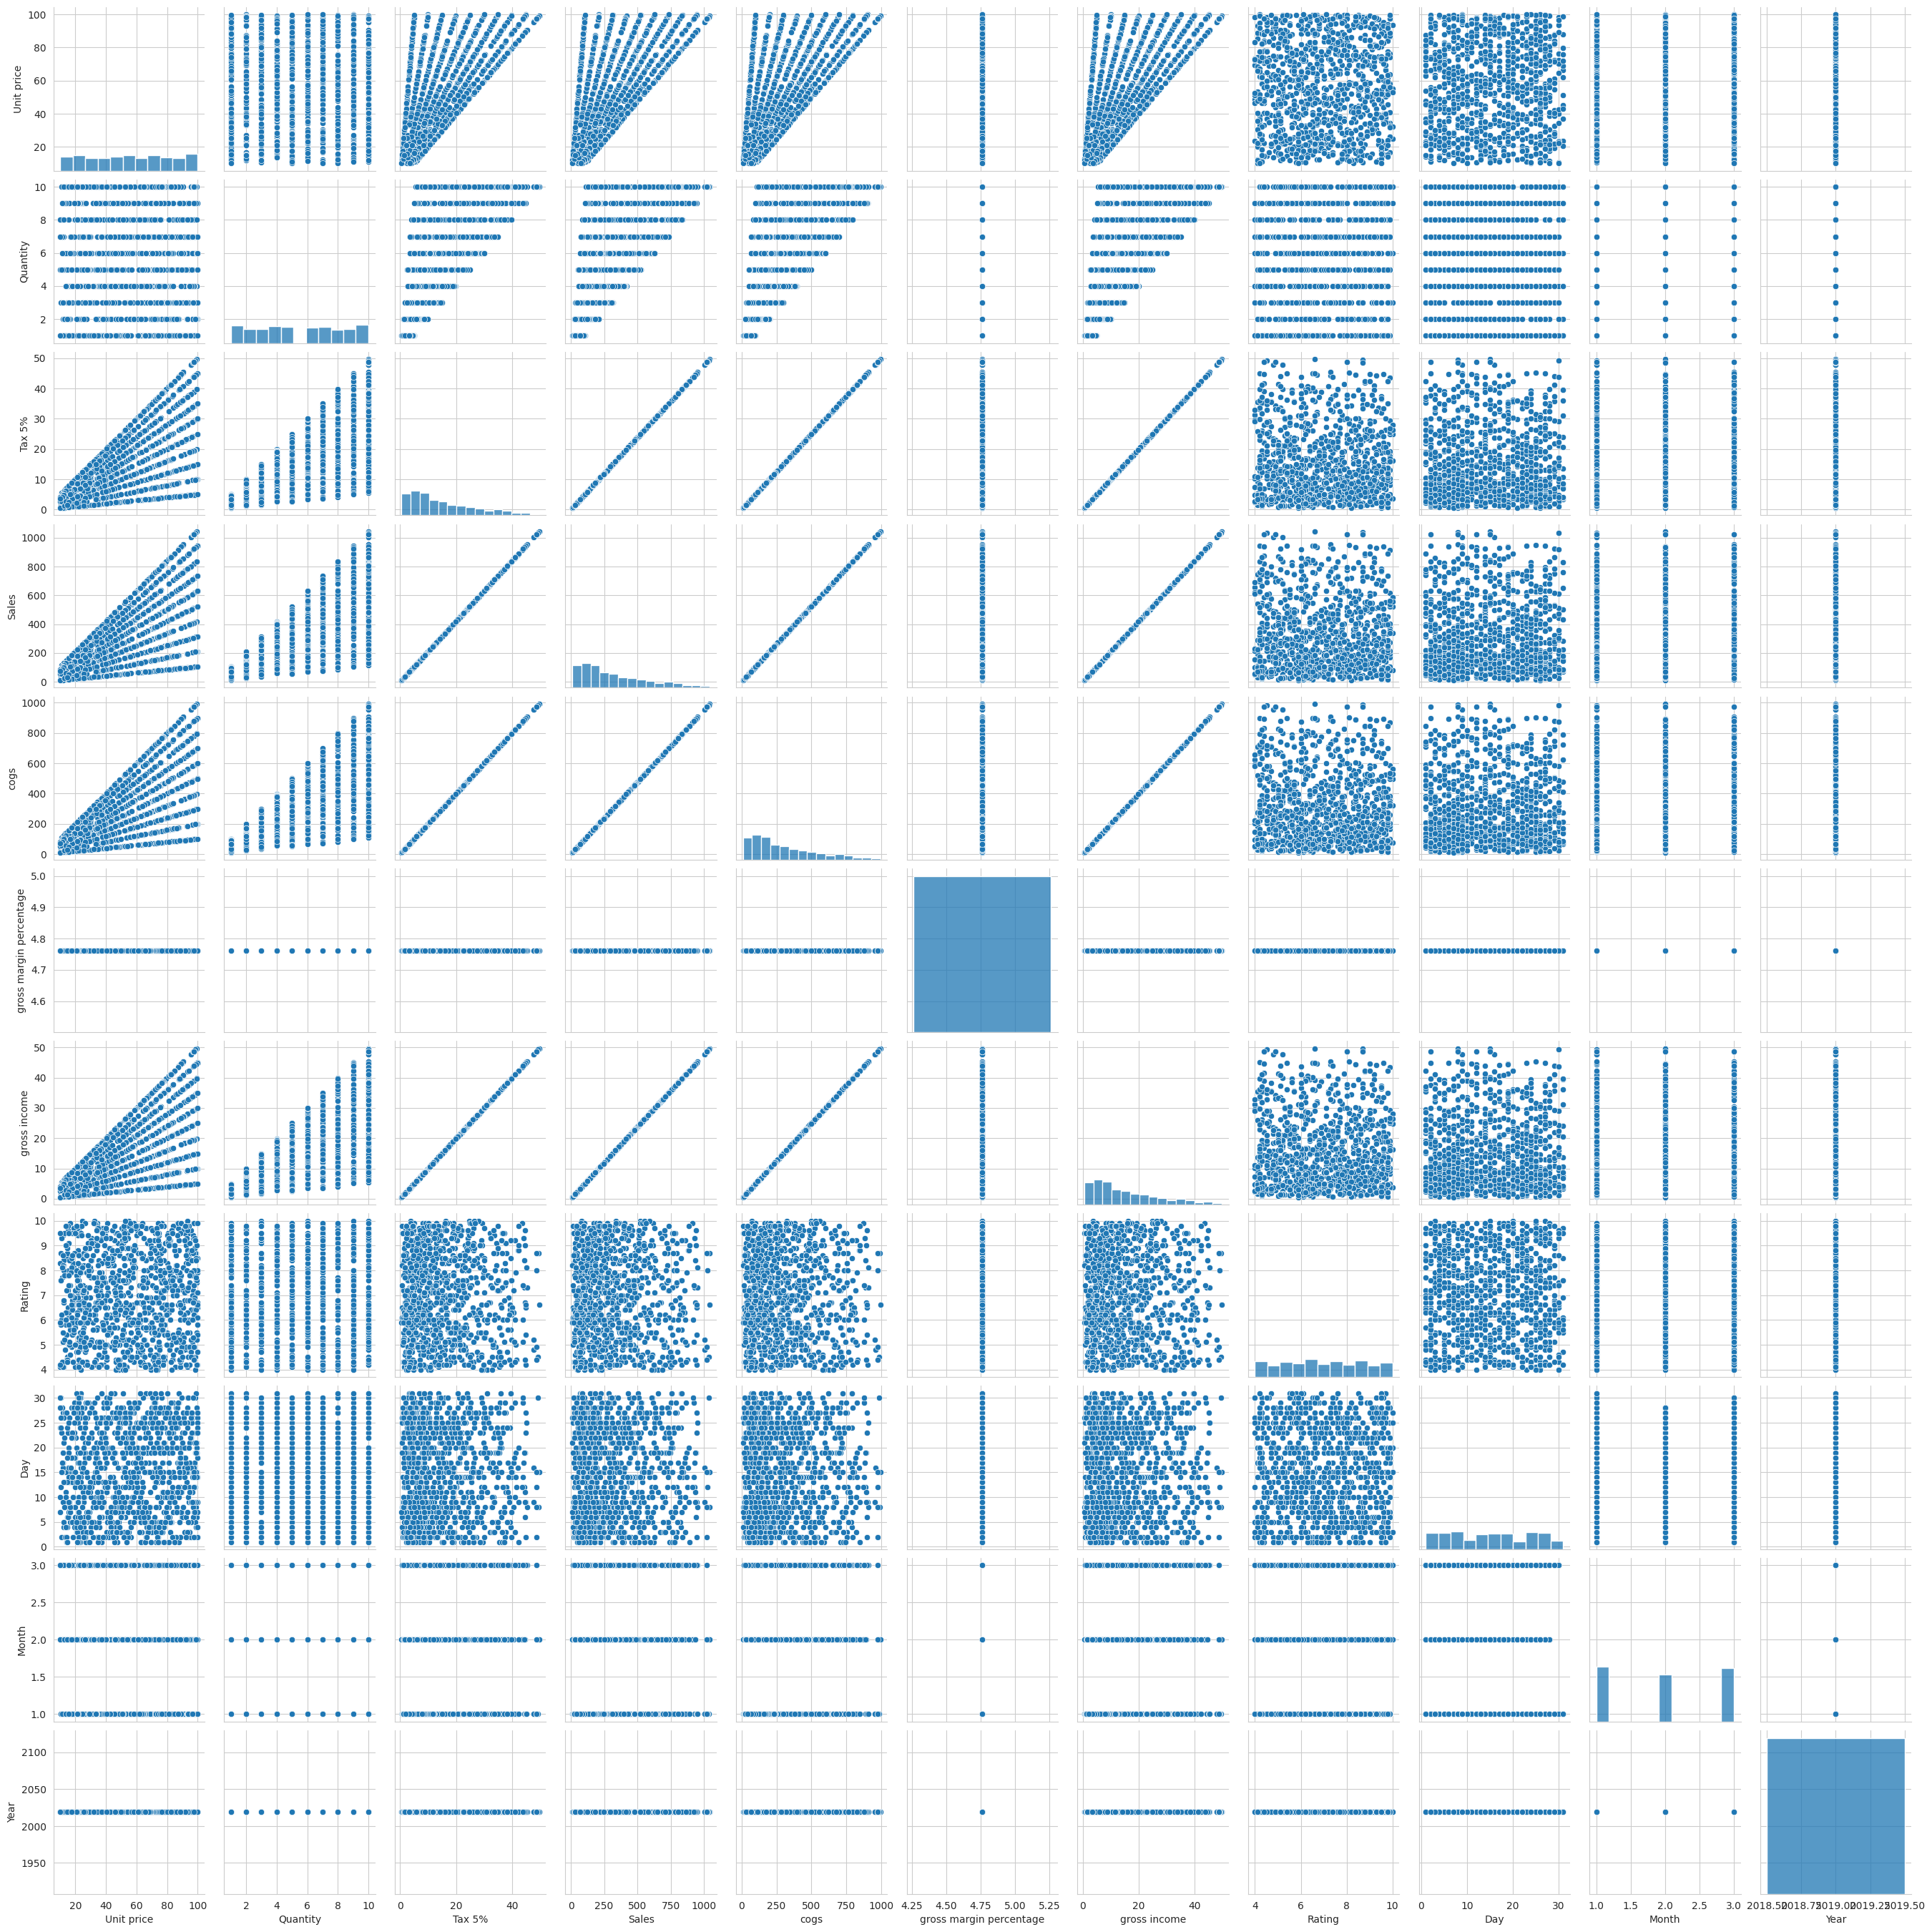

In [81]:
sns.pairplot(data=df)

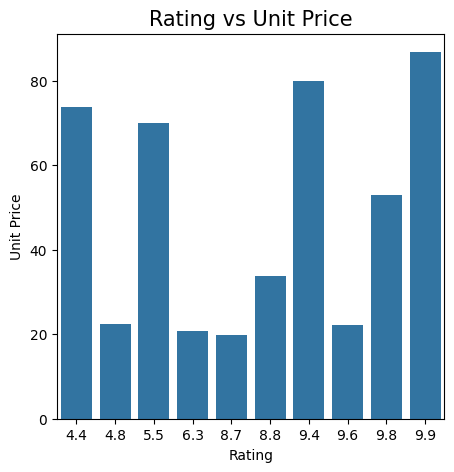

In [82]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Unit price", data=df[170:180])
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

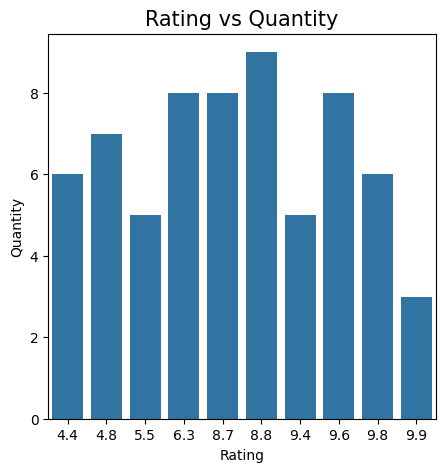

In [83]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Quantity", data=df[170:180])
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

In [87]:
df_numeric = df.select_dtypes(include='number')
df_numeric.corr()

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,0.057021,-0.027387,NaN
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,-0.043347,-0.014524,NaN
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN
Sales,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.007076,-0.042880,NaN
Day,0.057021,-0.043347,-0.002515,-0.002515,-0.002515,NaN,-0.002515,-0.007076,1.000000,-0.118996,NaN
Month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,NaN,-0.022301,-0.042880,-0.118996,1.000000,NaN


In [85]:
df.dtypes

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Sales,float64


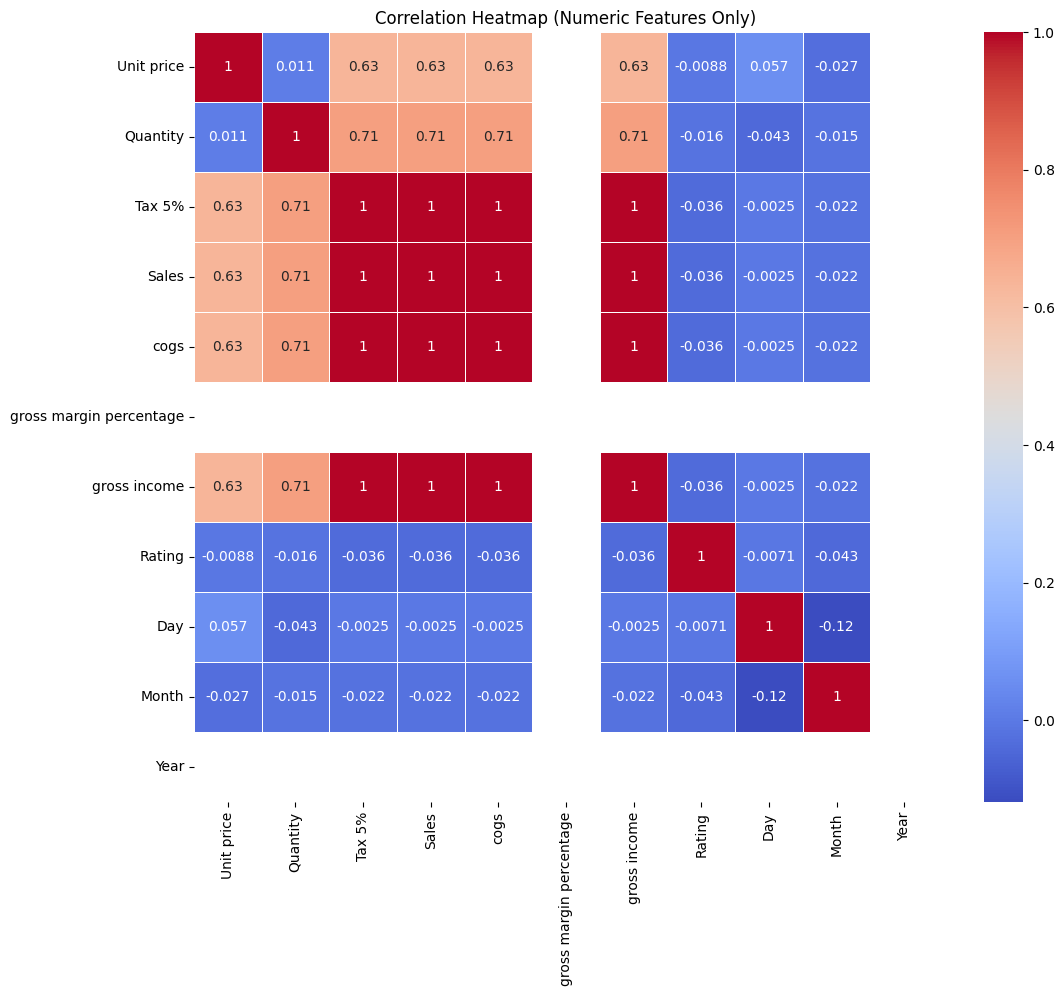

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter numeric columns
df_numeric = df.select_dtypes(include='number')

# Create correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()



[1] Customer Category by Items Bought:
 Customer type
Member    3181
Normal    2329
Name: Quantity, dtype: int64


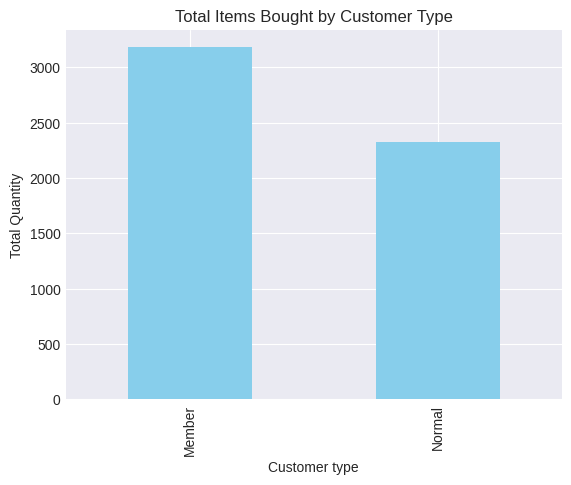


[2] Product Ratings (Best to Worst):
 Product line
Food and beverages        7.113218
Fashion accessories       7.029213
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Home and lifestyle        6.837500
Name: Rating, dtype: float64


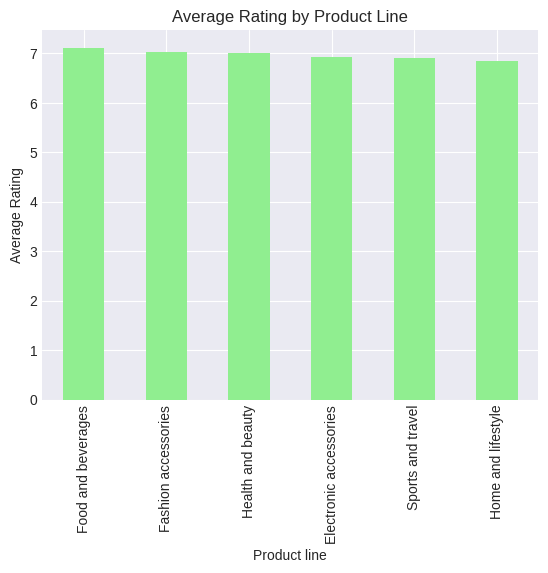


[3] Best-Selling Product Lines by Revenue:
 Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: Sales, dtype: float64


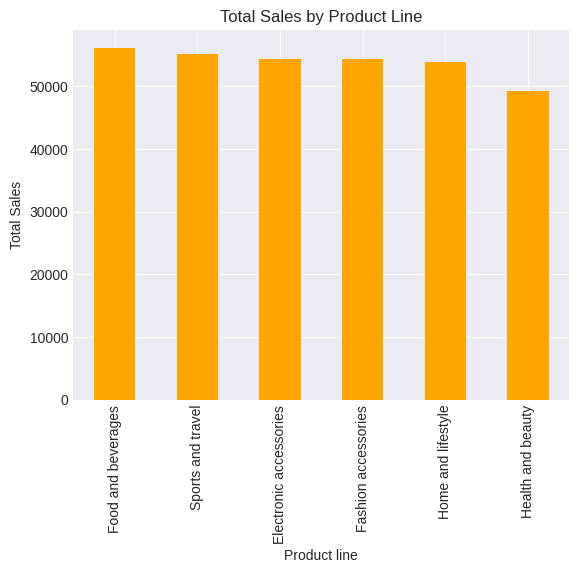


[4] Payment Method Popularity:
 Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


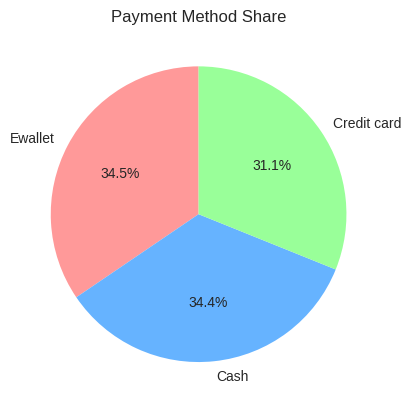


[5] City-wise Revenue:
 City
Naypyitaw    110568.7065
Yangon       106200.3705
Mandalay     106197.6720
Name: Sales, dtype: float64


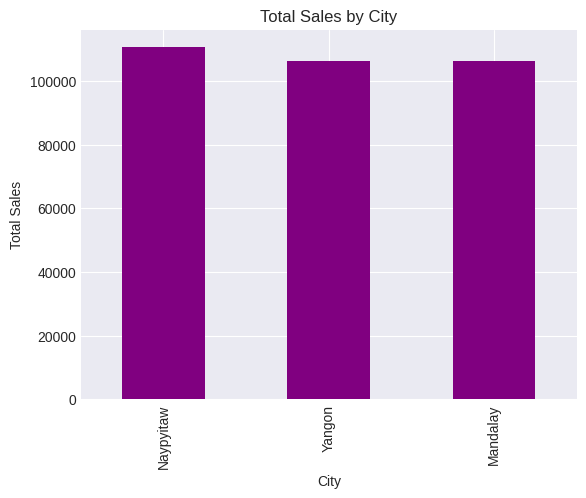


[6] Gender-wise Total Spending:
 Gender
Female    194671.8375
Male      128294.9115
Name: Sales, dtype: float64


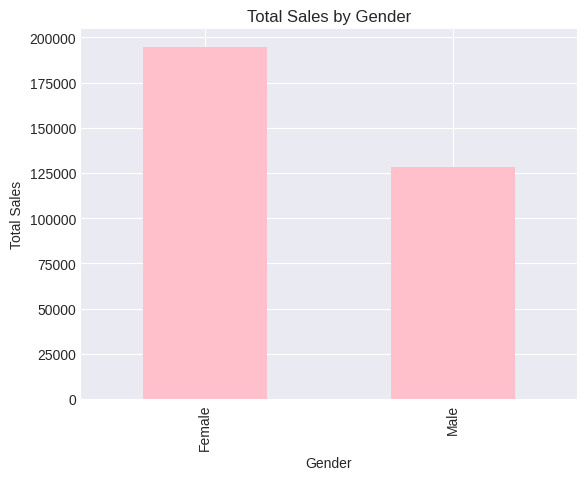


[7] Correlation between Unit Price and Quantity: 0.011


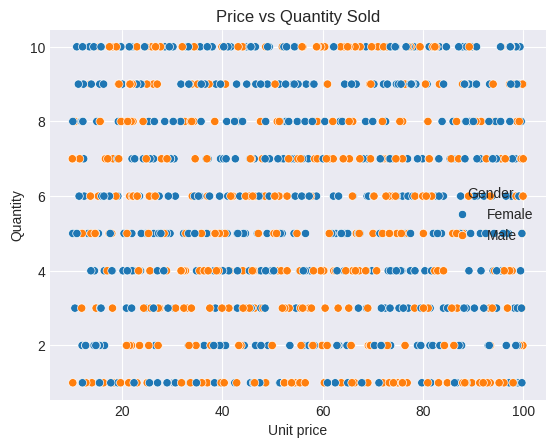


[8] Average Profit Margin by Product Line:
 Product line
Electronic accessories    4.761905
Fashion accessories       4.761905
Food and beverages        4.761905
Health and beauty         4.761905
Home and lifestyle        4.761905
Sports and travel         4.761905
Name: Profit Margin (%), dtype: float64


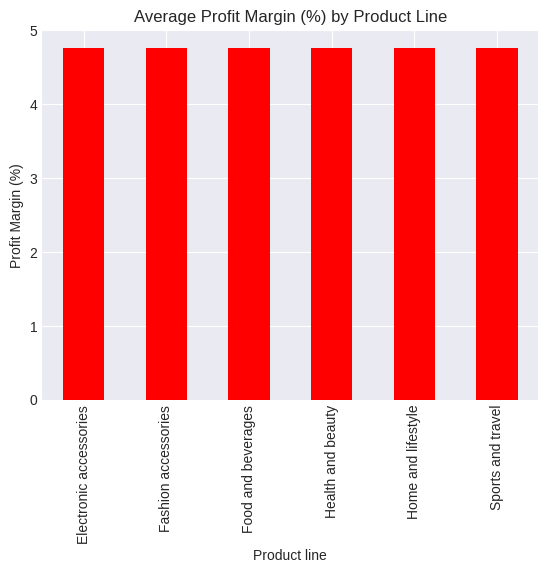


[9] No 'Date' column found, skipping Monthly Sales Trend.

✅ All insights generated successfully!


In [89]:
# ====================== Advanced Insights Function ======================
def all_insights(df):
    plt.style.use('seaborn-v0_8-darkgrid')

    # 1. Customer Category Bought More Items
    customer_items = df.groupby('Customer type')['Quantity'].sum().sort_values(ascending=False)
    print("\n[1] Customer Category by Items Bought:\n", customer_items)
    customer_items.plot(kind='bar', color='skyblue', title='Total Items Bought by Customer Type')
    plt.ylabel('Total Quantity')
    plt.show()

    # 2. Best & Worst Rated Products
    product_ratings = df.groupby('Product line')['Rating'].mean().sort_values(ascending=False)
    print("\n[2] Product Ratings (Best to Worst):\n", product_ratings)
    product_ratings.plot(kind='bar', color='lightgreen', title='Average Rating by Product Line')
    plt.ylabel('Average Rating')
    plt.show()

    # 3. Best-Selling Products by Revenue
    best_selling = df.groupby('Product line')['Sales'].sum().sort_values(ascending=False)
    print("\n[3] Best-Selling Product Lines by Revenue:\n", best_selling)
    best_selling.plot(kind='bar', color='orange', title='Total Sales by Product Line')
    plt.ylabel('Total Sales')
    plt.show()

    # 4. Payment Method Popularity
    payment_pref = df['Payment'].value_counts()
    print("\n[4] Payment Method Popularity:\n", payment_pref)
    payment_pref.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
    plt.title('Payment Method Share')
    plt.ylabel('')
    plt.show()

    # 5. City/Branch with Highest Revenue
    city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
    print("\n[5] City-wise Revenue:\n", city_sales)
    city_sales.plot(kind='bar', color='purple', title='Total Sales by City')
    plt.ylabel('Total Sales')
    plt.show()

    # 6. Gender-wise Spending
    gender_spending = df.groupby('Gender')['Sales'].sum().sort_values(ascending=False)
    print("\n[6] Gender-wise Total Spending:\n", gender_spending)
    gender_spending.plot(kind='bar', color='pink', title='Total Sales by Gender')
    plt.ylabel('Total Sales')
    plt.show()

    # 7. Correlation Between Price & Quantity
    corr_value = df['Unit price'].corr(df['Quantity'])
    print("\n[7] Correlation between Unit Price and Quantity:", round(corr_value, 3))
    sns.scatterplot(data=df, x='Unit price', y='Quantity', hue='Gender')
    plt.title('Price vs Quantity Sold')
    plt.show()

    # 8. Profit Margin Analysis
    df['Profit Margin (%)'] = (df['gross income'] / df['Sales']) * 100
    profit_margin = df.groupby('Product line')['Profit Margin (%)'].mean().sort_values(ascending=False)
    print("\n[8] Average Profit Margin by Product Line:\n", profit_margin)
    profit_margin.plot(kind='bar', color='red', title='Average Profit Margin (%) by Product Line')
    plt.ylabel('Profit Margin (%)')
    plt.show()

    # 9. Monthly Sales Trend
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df['Month'] = df['Date'].dt.month_name()
        monthly_sales = df.groupby('Month')['Sales'].sum()
        print("\n[9] Monthly Sales Trend:\n", monthly_sales)
        monthly_sales.plot(kind='line', marker='o', color='blue', title='Monthly Sales Trend')
        plt.ylabel('Total Sales')
        plt.show()
    else:
        print("\n[9] No 'Date' column found, skipping Monthly Sales Trend.")

    print("\n✅ All insights generated successfully!")

# Removed the function call from here as it's now in a separate cell.
# ====================== Function Call ======================
all_insights(df)

In [90]:
#lets find the categorialfeatures
list_1=list(df.columns)

In [91]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

In [92]:
le=LabelEncoder()

In [93]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [94]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Profit Margin (%)
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,146,2,522.83,4.761905,26.1415,9.1,5,1,2019,4.761905
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,23,0,76.40,4.761905,3.8200,9.6,8,3,2019,4.761905
2,653,0,2,1,0,4,46.33,7,16.2155,340.5255,155,1,324.31,4.761905,16.2155,7.4,3,3,2019,4.761905
3,18,0,2,0,0,3,58.22,8,23.2880,489.0480,485,2,465.76,4.761905,23.2880,8.4,27,1,2019,4.761905
4,339,0,2,0,0,5,86.31,7,30.2085,634.3785,29,2,604.17,4.761905,30.2085,5.3,8,2,2019,4.761905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,174,2,40.35,4.761905,2.0175,6.2,29,1,2019,4.761905
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,342,2,973.80,4.761905,48.6900,4.4,2,3,2019,4.761905
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,154,0,31.84,4.761905,1.5920,7.7,9,2,2019,4.761905
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,261,0,65.82,4.761905,3.2910,4.1,22,2,2019,4.761905


In [96]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df.drop(columns=['Date'], inplace=True)

# Prepare X, y
y = df['Gender']
x = df.drop('Gender', axis=1)

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [98]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [99]:
y_pred=knn.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.57      0.68      0.62       108
           1       0.52      0.41      0.46        92

    accuracy                           0.56       200
   macro avg       0.55      0.54      0.54       200
weighted avg       0.55      0.56      0.55       200

Confusion Matrix:
 [[73 35]
 [54 38]]
Training Score:
 67.5


In [104]:
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)


DecisionTreeRegressor()

In [105]:
y_pred=dtree.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.55      0.62      0.59       108
           1       0.48      0.41      0.44        92

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.53      0.52       200

Confusion Matrix:
 [[67 41]
 [54 38]]
Training Score:
 100.0


In [106]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [107]:
y_pred=rfc.predict(x_test)
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.55      0.78      0.64       108
           1       0.49      0.25      0.33        92

    accuracy                           0.54       200
   macro avg       0.52      0.51      0.49       200
weighted avg       0.52      0.54      0.50       200

Confusion Matrix:
 [[84 24]
 [69 23]]
Training Score:
 100.0


I have moved the function call to a new cell before the Label Encoding steps. You can now run this cell to generate the insights, and then proceed with the rest of the notebook for the Label Encoding and model training.